# Esercizio: IoT in Agricoltura

## Obiettivo
Classificare dati IoT da uno scenario Agriculture

## Dataset
- Utilizzeremo il dataset "IoT Agriculture 2024" da Kaggle
- Il dataset contiene misurazioni di sensori agricoli
- Target: predire l'attivazione del sistema di ventilazione (`Fan_actuator_ON`)

## Metriche di Valutazione
- Tempo di esecuzione per training e prediction
- Accuratezza della classificazione
- Matrice di confusione

In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wisam1985/iot-agriculture-2024")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\luigi\.cache\kagglehub\datasets\wisam1985\iot-agriculture-2024\versions\1


In [33]:
import pandas as pd
df = pd.read_csv(path + "/IoTProcessed_Data.csv")

In [34]:
df.describe()

,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
count,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000
mean,18.760113,50.329308,79.401587,231.963610,234.123332,225.171879,0.689863,0.310137,0.762091,0.237909,0.774142,0.225858
std,7.143422,22.995645,36.824610,34.718121,31.452138,44.877635,0.462555,0.462555,0.425809,0.425809,0.418152,0.418152
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,49.000000,79.000000,185.000000,190.000000,160.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,17.000000,59.000000,100.000000,255.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,25.000000,62.000000,100.000000,255.000000,255.000000,255.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,41.000000,100.000000,100.000000,255.000000,255.000000,259.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.head()

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,2024-02-08 06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0


In [36]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute


In [37]:
df.head()

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON,hour,minute
0,2024-02-08 06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0,6.0,10.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0,6.0,15.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0,6.0,20.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0,6.0,5.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0,6.0,0.0


In [38]:
#Cancelliamo la colonna date
df.drop('date', axis=1, inplace=True)


In [39]:
# Cerchiamo i valori nulli
missing_values = df.isna().sum()
missing_values

tempreature                0
humidity                   0
water_level                0
N                          0
P                          0
K                          0
Fan_actuator_OFF           0
Fan_actuator_ON            0
Watering_plant_pump_OFF    0
Watering_plant_pump_ON     0
Water_pump_actuator_OFF    0
Water_pump_actuator_ON     0
hour                       2
minute                     2
dtype: int64

In [40]:
data_cleaned = df.dropna()


In [41]:
#Rinominiamo le caratteristiche e il target dopo la pulizia
X_cleaned = data_cleaned.drop(['Fan_actuator_ON', 'Fan_actuator_OFF'], axis=1)
y_cleaned = data_cleaned['Fan_actuator_ON']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.25, random_state=42)

In [43]:
# Scaling the features
scaler_cleaned = StandardScaler()
X_train_scaled_cleaned = scaler_cleaned.fit_transform(X_train_cleaned)
X_test_scaled_cleaned = scaler_cleaned.transform(X_test_cleaned)

## Importiamo al classe KNN

In [44]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time

class KNearestNeighbors:
    """
    Implementazione dell'algoritmo K-Nearest Neighbors per classificazione.
    
    Parametri:
    ----------
    k : int, default=3
        Numero di vicini da considerare.
    metric : str, default='euclidean'
        Metrica di distanza da utilizzare ('euclidean', 'manhattan', 'minkowski').
    p : float, default=2
        Parametro per la distanza di Minkowski.
    weights : str, default='uniform'
        Tipo di pesatura ('uniform' o 'distance').
    """
    
    def __init__(self, k=3, metric='euclidean', p=2, weights='uniform'):
        self.k = k
        self.metric = metric
        self.p = p
        self.weights = weights
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """
        Memorizza i dati di training.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Dati di training.
        y : array-like, shape (n_samples,)
            Etichette di training.
        
        Returns:
        --------
        self : object
        """
        self.X_train = np.asarray(X)
        self.y_train = np.asarray(y)
        
        return self
    
    def _euclidean_distance(self, x1, x2):
        """Calcola la distanza euclidea tra due vettori."""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _manhattan_distance(self, x1, x2):
        """Calcola la distanza manhattan tra due vettori."""
        return np.sum(np.abs(x1 - x2))
    
    def _minkowski_distance(self, x1, x2, p):
        """Calcola la distanza di Minkowski tra due vettori."""
        return np.power(np.sum(np.power(np.abs(x1 - x2), p)), 1/p)
    
    def _compute_distance(self, x1, x2):
        """
        Calcola la distanza tra due vettori in base alla metrica specificata.
        
        Parametri:
        ----------
        x1 : array-like
            Primo vettore.
        x2 : array-like
            Secondo vettore.
        
        Returns:
        --------
        float : La distanza calcolata.
        """
        if self.metric == 'euclidean':
            return self._euclidean_distance(x1, x2)
        elif self.metric == 'manhattan':
            return self._manhattan_distance(x1, x2)
        elif self.metric == 'minkowski':
            return self._minkowski_distance(x1, x2, self.p)
        else:
            raise ValueError(f"Metrica '{self.metric}' non supportata")
    
    def predict(self, X):
        """
        Predice le classi per i campioni in X.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Campioni da classificare.
        
        Returns:
        --------
        array, shape (n_samples,) : Le classi predette.
        """
        X = np.asarray(X)
        y_pred = []
        
        for x in X:
            y_pred.append(self._predict_single(x))
            
        return np.array(y_pred)
    
    def _predict_single(self, x):
        """
        Predice la classe per un singolo campione.
        
        Parametri:
        ----------
        x : array-like, shape (n_features,)
            Campione da classificare.
        
        Returns:
        --------
        classe predetta
        """
        # Calcola le distanze tra x e tutti i campioni di training
        distances = []
        for i, x_train in enumerate(self.X_train):
            dist = self._compute_distance(x, x_train)
            distances.append((dist, i))
        
        # Ordina le distanze in ordine crescente e prendi i primi k elementi
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        
        if self.weights == 'uniform':
            # Restituisci la classe più frequente tra i k vicini
            k_nearest_labels = [self.y_train[idx] for _, idx in k_nearest]
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]
        
        elif self.weights == 'distance':
            # Restituisci la classe con il peso più alto basato sulla distanza
            class_weights = {}
            
            for dist, idx in k_nearest:
                label = self.y_train[idx]
                
                # Evita divisione per zero aggiungendo un piccolo epsilon
                weight = 1 / (dist + 1e-10)
                
                if label in class_weights:
                    class_weights[label] += weight
                else:
                    class_weights[label] = weight
            
            return max(class_weights.items(), key=lambda x: x[1])[0]
        
        else:
            raise ValueError(f"Tipo di peso '{self.weights}' non supportato")
    
    def score(self, X, y):
        """
        Calcola l'accuratezza del classificatore.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Campioni di test.
        y : array-like, shape (n_samples,)
            Etichette vere dei campioni di test.
        
        Returns:
        --------
        float : L'accuratezza del classificatore.
        """
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy
    
    def plot_decision_boundary(self, X, y, title=None, h=0.1):
        """
        Visualizza il decision boundary del classificatore.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Dati di training.
        y : array-like, shape (n_samples,)
            Etichette di training.
        title : str, optional
            Titolo del grafico.
        h : float, default=0.02
            Passo della griglia.
        """
        if X.shape[1] != 2:
            raise ValueError("Questa funzione può essere utilizzata solo con 2 feature.")
        
        # Creiamo una griglia di punti
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
        
        # Prediciamo la classe per ogni punto della griglia
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Creiamo la figura
        plt.figure(figsize=(10, 8))
        
        # Plot the decision boundary
        plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
        
        # Plot the training points
        unique_classes = np.unique(y)
        colors = plt.cm.viridis(np.linspace(0, 1, len(unique_classes)))
        
        for i, cls in enumerate(unique_classes):
            plt.scatter(X[y == cls, 0], X[y == cls, 1], 
                       c=[colors[i]], marker='o', edgecolor='k',
                       label=f'Classe {cls}')
        
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(title if title else f'Decision Boundary - KNN (k={self.k})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

In [45]:
import time
start_time = time.time()
knn = KNearestNeighbors(k=3, metric='euclidean', weights='uniform')
knn.fit(X_train_scaled_cleaned, y_train_cleaned)
print(f"Tempo di addestramento: {time.time() - start_time:.4f} secondi")

# Facciamo le predizioni e valutiamo il modello
start_time = time.time()
y_pred = knn.predict(X_test_scaled_cleaned)
print(f"Tempo di predizione: {time.time() - start_time:.4f} secondi")

# Calcoliamo l'accuratezza
accuracy = knn.score(X_test_scaled_cleaned, y_test_cleaned)
print(f"Accuratezza: {accuracy:.4f}")

Tempo di addestramento: 0.0000 secondi


KeyboardInterrupt: 

## Troppo tempo!
- Proviamo il kd-tree

In [ ]:
import numpy as np
from collections import Counter
import time


class KNNWithKDTree:
    """
    Implementazione di KNN con k-d tree per ricerca efficiente dei vicini.
    """
    def __init__(self, k=3, weights='uniform'):
        self.k = k
        self.weights = weights
        self.kdtree = None
    
    def fit(self, X, y):
        """Costruisce il k-d tree con i dati di training."""
        X = np.asarray(X)
        y = np.asarray(y)
        self.kdtree = KDTree(X, y)
        return self
    
    def predict(self, X):
        """Predice le classi per i campioni in X usando il k-d tree."""
        X = np.asarray(X)
        y_pred = []
        
        for x in X:
            # Troviamo i k vicini più prossimi
            k_nearest = self.kdtree.find_k_nearest(x, self.k)
            
            if not k_nearest:  # Se la lista è vuota
                # In questo caso, assegniamo una classe di default (la prima trovata nel dataset)
                # Questo non dovrebbe mai accadere con un dataset ben formato
                y_pred.append(0)
                continue
            
            if self.weights == 'uniform':
                # Voto uniforme: prendiamo la classe più frequente
                k_nearest_labels = [label for _, label, _ in k_nearest]
                most_common = Counter(k_nearest_labels).most_common(1)
                y_pred.append(most_common[0][0])
            
            elif self.weights == 'distance':
                # Voto pesato: pesiamo in base alla distanza
                class_weights = {}
                
                for _, label, dist in k_nearest:
                    # Evita divisione per zero
                    weight = 1 / (dist + 1e-10)
                    
                    if label in class_weights:
                        class_weights[label] += weight
                    else:
                        class_weights[label] = weight
                
                # Restituisce la classe con il peso maggiore
                predicted_class = max(class_weights.items(), key=lambda x: x[1])[0]
                y_pred.append(predicted_class)
        
        return np.array(y_pred)
    
    def score(self, X, y):
        """Calcola l'accuratezza del classificatore."""
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

class KDNode:
    """
    Nodo di un k-d tree.
    """
    def __init__(self, point, label, left=None, right=None, axis=0):
        self.point = point
        self.label = label
        self.left = left
        self.right = right
        self.axis = axis

class KDTree:
    """
    Implementazione di un k-d tree per la ricerca efficiente dei vicini.
    """
    def __init__(self, points, labels):
        self.root = None
        if len(points) > 0:
            self.k = len(points[0])
            points = np.asarray(points)
            labels = np.asarray(labels)
            self.root = self._build_tree(points, labels, 0)
    
    def _build_tree(self, points, labels, depth):
        """Costruisce ricorsivamente l'albero."""
        n = len(points)
        if n == 0:
            return None
        
        # Selezioniamo l'asse in base alla profondità corrente
        axis = depth % self.k
        
        # Ordiniamo i punti in base all'asse corrente
        sorted_idx = np.argsort(points[:, axis])
        points = points[sorted_idx]
        labels = labels[sorted_idx]
        
        # Prendiamo il punto mediano come nodo corrente
        median = n // 2
        
        # Creiamo ricorsivamente i sottoalberi
        return KDNode(
            point=points[median],
            label=labels[median],
            left=self._build_tree(points[:median], labels[:median], depth+1),
            right=self._build_tree(points[median+1:], labels[median+1:], depth+1),
            axis=axis
        )
    
    
    def find_k_nearest(self, point, k):
        """Trova i k punti più vicini a point."""
        import heapq
        if self.root is None:
            return []
        
        # Lista di k punti più vicini [(dist, label_id, point, label), ...]
        # Aggiungiamo label_id per evitare errori di confronto tra array
        nearest = []
        
        # Usiamo una funzione interna per la ricerca
        def _search(node):
            if node is None:
                return
            
            # Calcoliamo la distanza euclidea
            dist = float(np.sqrt(np.sum((node.point - point) ** 2)))
            
            # Se non abbiamo ancora k punti o questo è migliore dell'attuale peggiore
            if len(nearest) < k:
                # Aggiungiamo un id univoco per evitare confronti tra array
                heapq.heappush(nearest, (-dist, id(node), node.point, node.label))
            elif -dist > nearest[0][0]:  # Confrontiamo solo scalari
                heapq.heappop(nearest)
                heapq.heappush(nearest, (-dist, id(node), node.point, node.label))
            
            # Determiniamo quale sottoalbero attraversare prima
            axis = node.axis
            next_branch = node.left if point[axis] < node.point[axis] else node.right
            other_branch = node.right if point[axis] < node.point[axis] else node.left
            
            # Visitiamo il ramo più promettente
            _search(next_branch)
            
            # Verifichiamo se dobbiamo visitare anche l'altro ramo
            if len(nearest) < k or abs(float(point[axis] - node.point[axis])) < -nearest[0][0]:
                _search(other_branch)
        
        # Iniziamo la ricerca dalla radice
        _search(self.root)
        
        # Convertiamo il formato e ordiniamo per distanza
        result = []
        for neg_dist, _, p, label in sorted(nearest, key=lambda x: -x[0]):
            result.append((p, label, -neg_dist))
        
        return result


In [ ]:
X_test_scaled_cleaned

array([[-0.8036723 , -1.91753622,  0.55905065, ..., -0.54028247,
         1.77976757, -0.853701  ],
       [ 1.99787703, -0.14008319, -2.1607436 , ...,  1.85088366,
        -0.82457677, -0.33199404],
       [ 0.8772573 ,  0.38014697,  0.55905065, ..., -0.54028247,
        -1.25863416,  0.47955012],
       ...,
       [-0.24336243,  0.94372963,  0.04228974, ..., -0.54028247,
         1.63508177,  0.24768036],
       [-0.52351737,  0.64026204,  0.55905065, ..., -0.54028247,
         0.18822381, -0.15809172],
       [-0.52351737, -1.83083119,  0.55905065, ..., -0.54028247,
        -0.10114779,  0.47955012]], shape=(9480, 12))

In [46]:
# KNN con k-d tree
start_time = time.time()
knn_kd = KNNWithKDTree(k=3)
knn_kd.fit(X_train_scaled_cleaned, y_train_cleaned)
y_pred_kd = knn_kd.predict(X_test_scaled_cleaned)
time_kd = time.time() - start_time
accuracy_kd = np.mean(y_pred_kd == y_test_cleaned)
print(f"KNN con k-d tree: Accuratezza = {accuracy_kd:.4f}, Tempo = {time_kd:.4f} secondi")


KNN con k-d tree: Accuratezza = 0.9905, Tempo = 61.5620 secondi


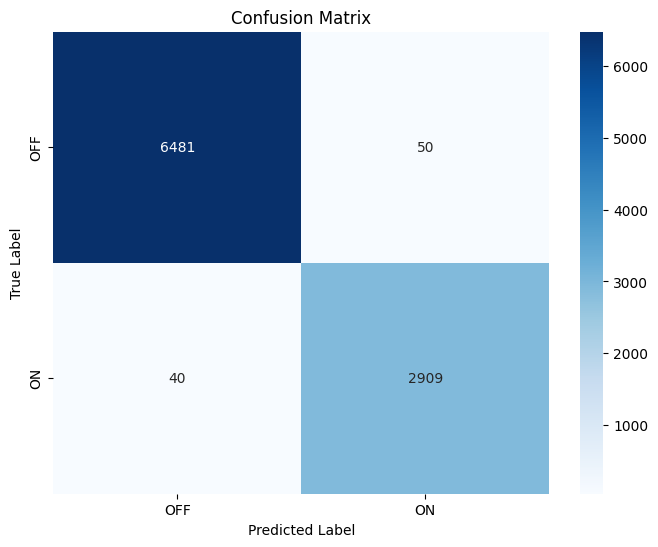

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_cleaned, y_pred_kd)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["OFF", "ON"], yticklabels=["OFF", "ON"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()